<a href="https://colab.research.google.com/github/swostika17/CN6005AI/blob/main/week3(Lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/titanic (1).csv')


In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [ ]:
df['Name'].value_counts()

,count
Name,
"Dooley, Mr. Patrick",1
"Braund, Mr. Owen Harris",1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1
"Heikkinen, Miss. Laina",1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...
"Hewlett, Mrs. (Mary D Kingcome)",1
"Vestrom, Miss. Hulda Amanda Adolfina",1
"Andersson, Mr. Anders Johan",1


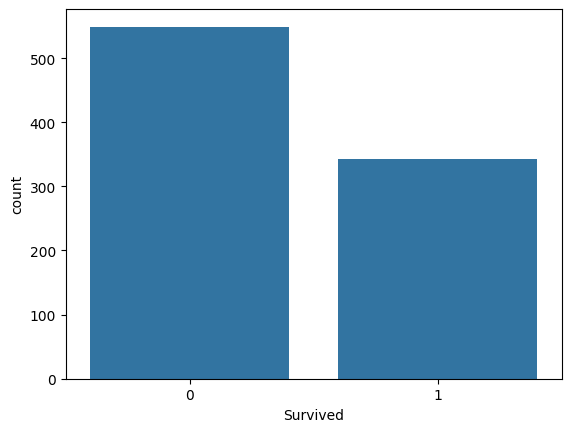

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)

# Show the plot
plt.show()

In [ ]:
count_no_sub = len(df[df['Survived']==0])
count_sub = len(df[df['Survived']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Survived is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Survived", pct_of_sub*100)

percentage of no Survived is 61.61616161616161
percentage of Survived 38.38383838383838


In [ ]:
df.groupby(['Survived'])[['Age', 'Fare']].mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [ ]:
feature_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Survived']
X = df[feature_cols] # Featur


y = df.Survived # Target variable
X
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
df = df.drop(['Ticket', 'Cabin'], axis=1, errors='ignore')

# Handle missing values (fill numeric with median, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Drop any remaining non-numeric columns just in case
df = df.select_dtypes(include=['number'])

/tmp/ipython-input-2225617877.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2225617877.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
X = df.drop('Survived', axis=1, errors='ignore')
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Logistic Regression model
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print(y_test.value_counts())

Survived
0    107
1     72
Name: count, dtype: int64


In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[93, 14],
       [35, 37]])

Text(0.5, 427.9555555555555, 'Predicted label')

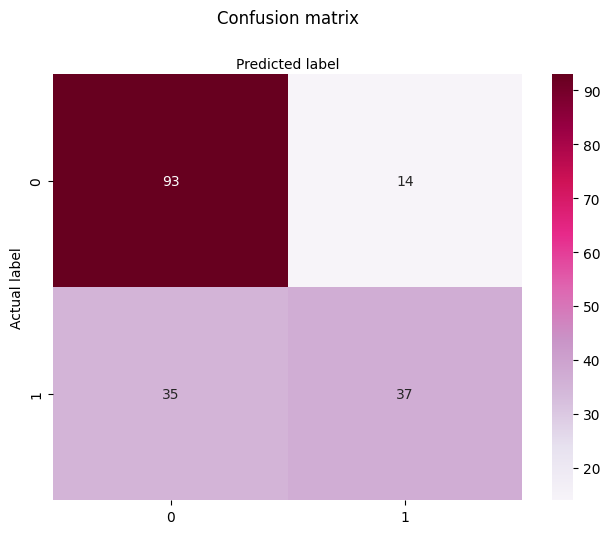

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.7254901960784313
Recall: 0.5138888888888888


In [ ]:
from sklearn.metrics import classification_report

# Define readable class labels
target_names = ['Not Survived', 'Survived']

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.73      0.87      0.79       107
    Survived       0.73      0.51      0.60        72

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.72       179



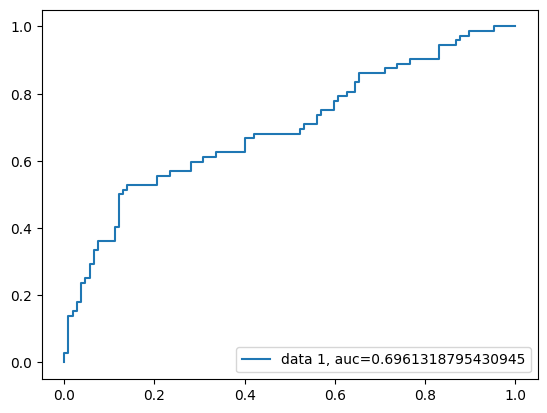

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [ ]:
y_resampled.value_counts()

,count
Survived,
0,549
1,549


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95, 40],
       [52, 88]])

Text(0.5, 427.9555555555555, 'Predicted label')

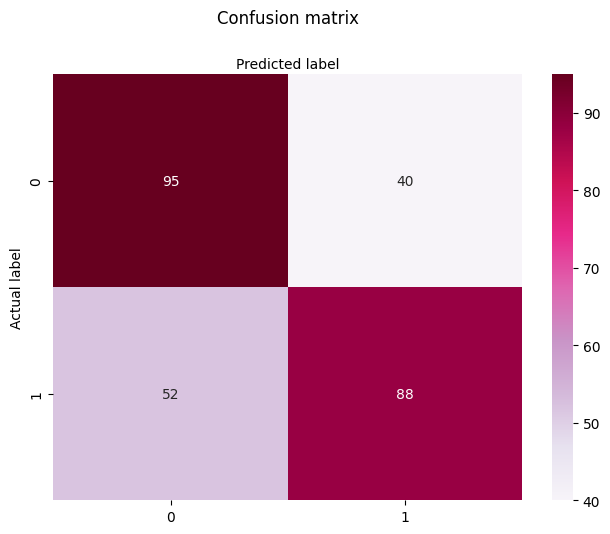

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6875
0.6285714285714286


In [ ]:
# Define class names as 0 and 1
target_names = ['0', '1']

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       135
           1       0.69      0.63      0.66       140

    accuracy                           0.67       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.67      0.67      0.67       275



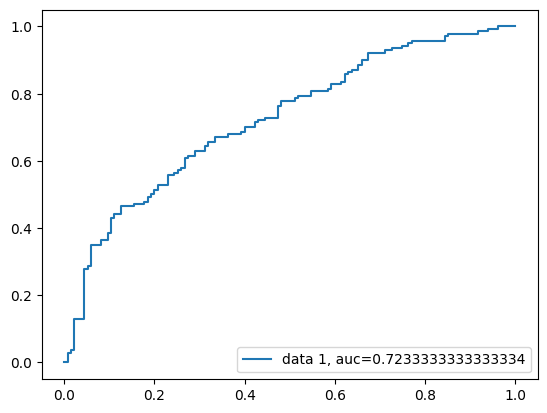

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()